# Gauss-Seidel Method of Solving Linear Equations

## Definitions

In [3]:
import matplotlib.pyplot as plt

# Definition of the Gauss-Seidel iterative method
def gauss_seidel_iteration(A, b, x0, max_iterations, tol):
    n = len(A)
    x = x0.copy()
    errors = []

    for iteration in range(max_iterations):
        for i in range(n):
            sum_ax = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - sum_ax) / A[i][i]

        error = max(abs(x[i] - x0[i]) for i in range(n))
        errors.append(error)
        x0 = x.copy()

        if error < tol:
            print("")
            print(f"Converged after {iteration + 1} iterations.")
            print(f"Last error: {error}")
            return x, errors

    print("Did not converge within the specified number of iterations.")
    return None, errors

# Definition to check for diagonal dominance
def is_diagonally_dominant(A):
    n = len(A)
    for i in range(n):
        diagonal_element = abs(A[i][i])
        sum_of_off_diagonal_elements = sum(abs(A[i][j]) for j in range(n) if j != i)
        if diagonal_element <= sum_of_off_diagonal_elements:
            return False
    return True

## Main Code

Enter the number of equations: 3
Enter the coefficients of equation 1 separated by spaces: 10 1 2
Enter the coefficients of equation 2 separated by spaces: 1 10 3
Enter the coefficients of equation 3 separated by spaces: 2 3 10
Enter the constants vector b separated by spaces: 13 15 17
Enter the initial guess vector x0 separated by spaces: 0 0 0
Enter the maximum number of iterations: 100
Enter the convergence tolerance: 0.00001

Converged after 7 iterations.
Last error: 1.5452340902388784e-06
Solution: [0.9564219457096295, 1.0458714876537016, 1.1949541645619637]


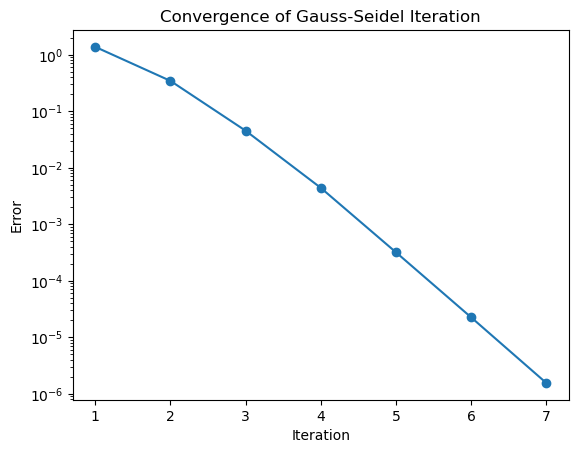

In [5]:
# Get user input for matrix A
n = int(input("Enter the number of equations: "))
A = []
for i in range(n):
    row = list(map(float, input(f"Enter the coefficients of equation {i+1} separated by spaces: ").split()))
    A.append(row)

# Get user input for vector b
b = list(map(float, input("Enter the constants vector b separated by spaces: ").split()))

# Get user input for initial guess x0
x0 = list(map(float, input("Enter the initial guess vector x0 separated by spaces: ").split()))

# Get user input for maximum iterations and tolerance
max_iterations = int(input("Enter the maximum number of iterations: "))
tolerance = float(input("Enter the convergence tolerance: "))

# Check if the matrix is diagonally dominant
if is_diagonally_dominant(A):
    solution, errors = gauss_seidel_iteration(A, b, x0, max_iterations, tolerance)
    if solution is not None:
        print("Solution:", solution)

        # Plotting the convergence
        plt.plot(range(1, len(errors) + 1), errors, marker='o')
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Error')
        plt.title('Convergence of Gauss-Seidel Iteration')
        plt.show()
else:
    print("")
    print("The matrix is not diagonally dominant. The Gauss-Seidel method may not converge.")